In [73]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter
from utils.FeatureSelection import FeatureSelection

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [74]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')
df = pd.read_csv(f"{file_path}/8.gurgaon_properties_missing_value_imputation.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m woodshire,sector 107,0.80,5857.0,2,2,3+,7.0,Relatively New,1236.0,0,0,0,0,0,1,165
1,flat,not applicable,sector 4,0.42,5600.0,2,2,1,3.0,Relatively New,833.0,0,0,0,0,0,1,26
2,flat,kashish manor one,sector 111,1.65,7097.0,3,4,3+,14.0,Under Construction,2104.0,0,1,0,0,1,0,8
3,house,independent,sector 3,0.90,10000.0,3,4,3,3.0,Moderately Old,3500.0,0,0,0,0,1,1,42
4,flat,ss the leaf,sector 85,1.10,6318.0,2,2,3+,3.0,Relatively New,1464.0,0,0,1,0,0,0,143


In [75]:
df.shape

(3555, 18)

# ---------------- Feature Engineering Operation ---------------------------

In [76]:
## Column drop in 
train_df = df.drop(columns=['society','price_per_sqft'])
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 107,0.80,2,2,3+,7.0,Relatively New,1236.0,0,0,0,0,0,1,165
1,flat,sector 4,0.42,2,2,1,3.0,Relatively New,833.0,0,0,0,0,0,1,26
2,flat,sector 111,1.65,3,4,3+,14.0,Under Construction,2104.0,0,1,0,0,1,0,8
3,house,sector 3,0.90,3,4,3,3.0,Moderately Old,3500.0,0,0,0,0,1,1,42
4,flat,sector 85,1.10,2,2,3+,3.0,Relatively New,1464.0,0,0,1,0,0,0,143


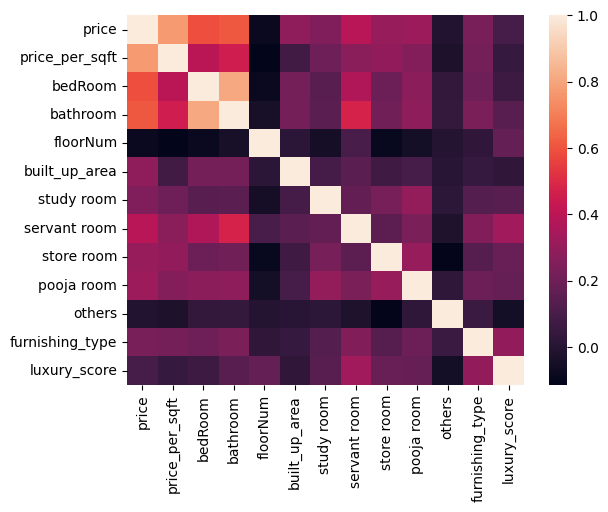

In [77]:
## Correlation between all numerical columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr())
plt.show()

In [78]:
## Correlation Price Vs all numerical Columns
numeric_df.corr()['price'].sort_values(ascending=False)

price              1.000000
price_per_sqft     0.773688
bathroom           0.611357
bedRoom            0.588803
servant room       0.393186
pooja room         0.319284
store room         0.304511
built_up_area      0.289014
study room         0.243457
furnishing_type    0.227227
luxury_score       0.091084
others            -0.013250
floorNum          -0.086739
Name: price, dtype: float64

In [79]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### luxury_score Deep Analysis

categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


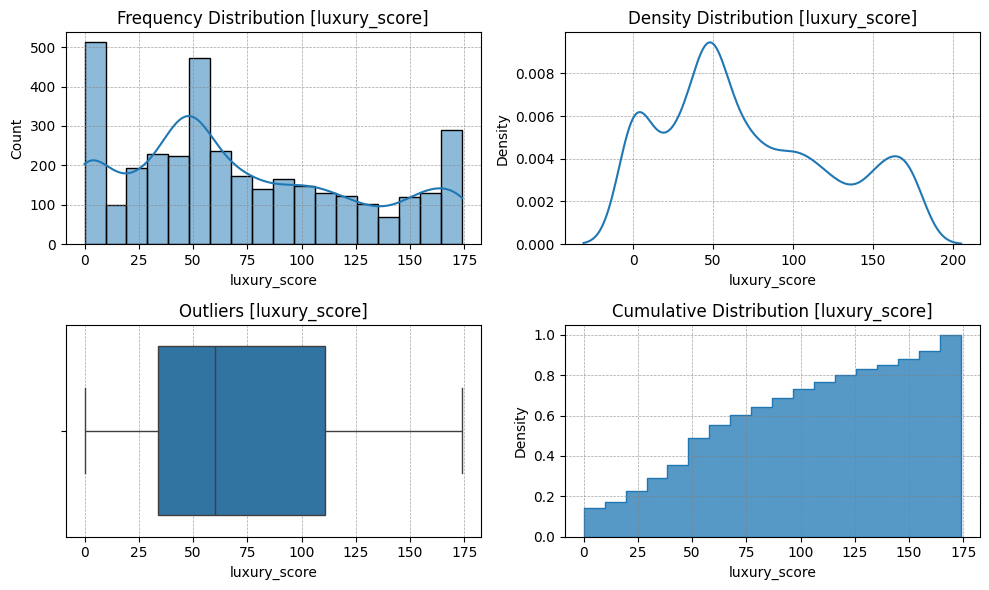

In [80]:
df_uni = UnivariateAnalysis(train_df)
print(df_uni)
a,b = df_uni.NumericalFeatureAnalysis('luxury_score')

### Adding luxury_category form [luxury_score Manual Binning (Rule-Based Binning)]

In [81]:
## Adding luxury_category column using Manual Binning 

def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [82]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 107,0.80,2,2,3+,7.0,Relatively New,1236.0,0,0,0,0,0,1,165,High
1,flat,sector 4,0.42,2,2,1,3.0,Relatively New,833.0,0,0,0,0,0,1,26,Low
2,flat,sector 111,1.65,3,4,3+,14.0,Under Construction,2104.0,0,1,0,0,1,0,8,Low
3,house,sector 3,0.90,3,4,3,3.0,Moderately Old,3500.0,0,0,0,0,1,1,42,Low
4,flat,sector 85,1.10,2,2,3+,3.0,Relatively New,1464.0,0,0,1,0,0,0,143,Medium


categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession', 'luxury_category']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


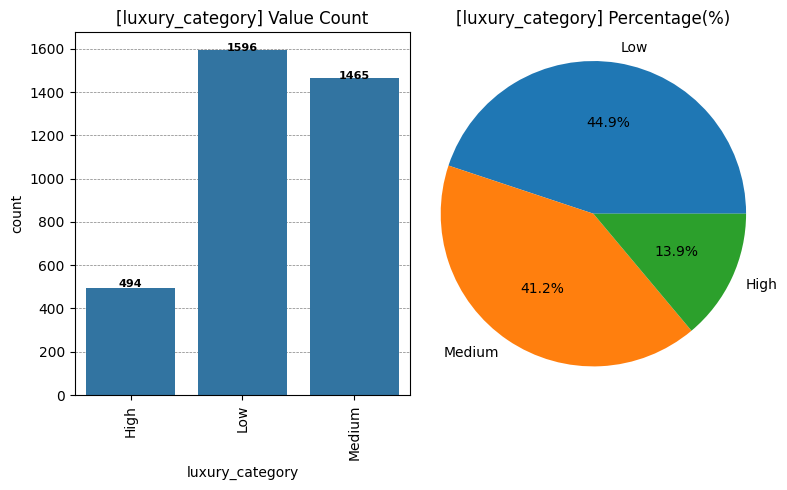

,field,luxury_category
0,non_null_count,3555
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,3
5,top_value,Low
6,top_count,1596
7,top_pct,44.89
8,top_3,"[Low, Medium, High]"
9,top_3_pct,"[44.89, 41.21, 13.9]"


In [83]:
### Data Visualization for luxury_category column 

df_uni = UnivariateAnalysis(train_df)
print(df_uni)
df_uni.CategoricalFeaturesAnalysis('luxury_category')

### Adding floor_category form [floorNum luxury_score Manual Binning (Rule-Based Binning)]

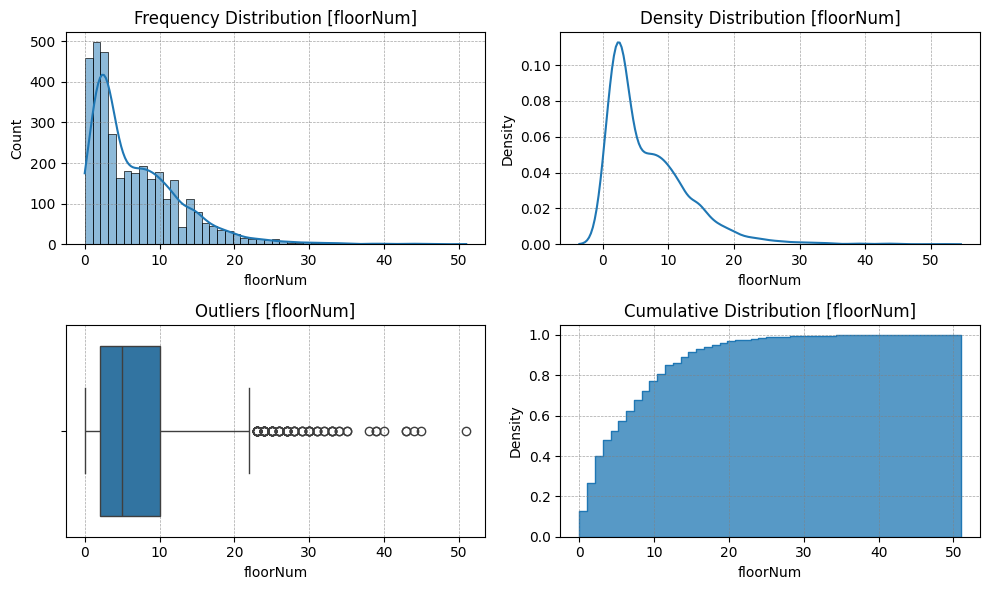

In [84]:
## Initial Observation 
df_uni = UnivariateAnalysis(train_df)
a,b = df_uni.NumericalFeatureAnalysis('floorNum')

In [85]:
## Adding floor_category column using Manual Binning 
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins
    
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 107,0.80,2,2,3+,7.0,Relatively New,1236.0,0,0,0,0,0,1,165,High,Mid Floor
1,flat,sector 4,0.42,2,2,1,3.0,Relatively New,833.0,0,0,0,0,0,1,26,Low,Mid Floor
2,flat,sector 111,1.65,3,4,3+,14.0,Under Construction,2104.0,0,1,0,0,1,0,8,Low,High Floor
3,house,sector 3,0.90,3,4,3,3.0,Moderately Old,3500.0,0,0,0,0,1,1,42,Low,Mid Floor
4,flat,sector 85,1.10,2,2,3+,3.0,Relatively New,1464.0,0,0,1,0,0,0,143,Medium,Mid Floor


In [86]:
## Export dataframe pre categorical Tranformation

export_post_categorical_tran = train_df.copy()
export_post_categorical_tran.drop(columns=['pooja room', 'study room', 'luxury_score','floorNum','others'], inplace=True)
export_post_categorical_tran.to_csv(f"{file_path}/10.gurgaon_properties_post_feature_selection_v2.csv", index=False)


categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession', 'luxury_category', 'floor_category']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


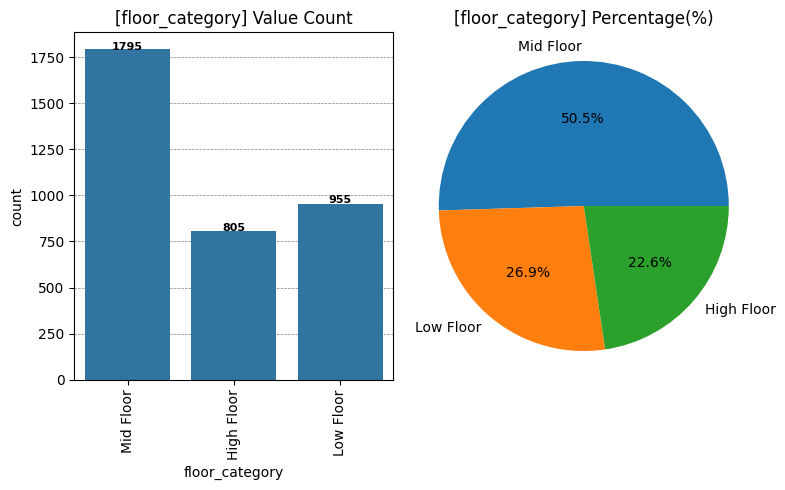

,field,floor_category
0,non_null_count,3555
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,3
5,top_value,Mid Floor
6,top_count,1795
7,top_pct,50.49
8,top_3,"[Mid Floor, Low Floor, High Floor]"
9,top_3_pct,"[50.49, 26.86, 22.64]"


In [87]:
### Data Visualization for luxury_category column 

df_uni = UnivariateAnalysis(train_df)
print(df_uni)
df_uni.CategoricalFeaturesAnalysis('floor_category')

In [88]:
## Column drop 'floorNum','luxury_score'
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)
train_df.head(2)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 107,0.80,2,2,3+,Relatively New,1236.0,0,0,0,0,0,1,High,Mid Floor
1,flat,sector 4,0.42,2,2,1,Relatively New,833.0,0,0,0,0,0,1,Low,Mid Floor


In [89]:
len(train_df.columns)

16

### Categorical Column Encoding

In [90]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

# Categorical Column filter
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
   
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.feature_names_in_)
    print(f"{oe.categories_}\n")

['property_type']
[array(['flat', 'house'], dtype=object)]

['sector']
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 

In [91]:
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

# ---------------------- Feature Selection Operation ---------------------

#### Technique 1 - Correlation Analysis

<Axes: >

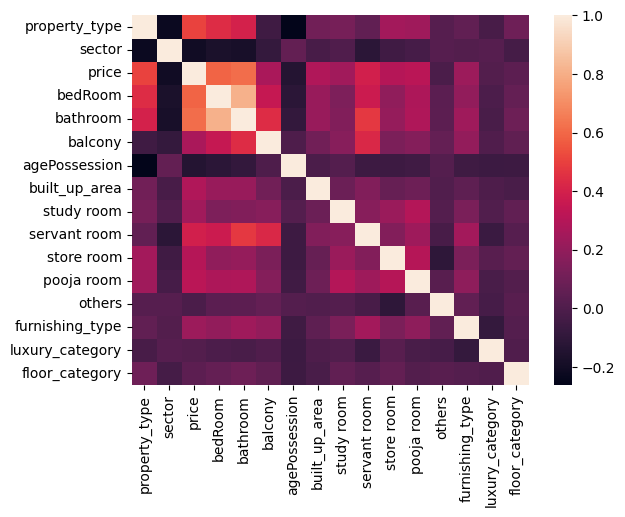

In [92]:
sns.heatmap(data_label_encoded.corr())

In [93]:
feature = FeatureSelection(data_label_encoded)

fi_df1_corr = feature.CorrFeatureSelection(dependent_col='price')
fi_df1_corr

,feature,corr_coeff
3,bathroom,0.611357
2,bedRoom,0.588803
0,property_type,0.503618
8,servant room,0.393186
10,pooja room,0.319284
9,store room,0.304511
6,built_up_area,0.289014
4,balcony,0.270508
7,study room,0.243457
12,furnishing_type,0.227227


#### Technique 2 - Random Forest Feature Importance

In [94]:
feature = FeatureSelection(data_label_encoded)
fi_df2_rfr = feature.RFRFeatureSelection(dependent_col='price')
fi_df2_rfr

,feature,rf_importance
6,built_up_area,0.626847
0,property_type,0.115759
1,sector,0.109332
2,bedRoom,0.026879
8,servant room,0.024189
3,bathroom,0.023917
5,agePossession,0.015111
4,balcony,0.012833
12,furnishing_type,0.010015
7,study room,0.008583


### Technique 3 - Gradient Boosting Feature importances

In [95]:
feature = FeatureSelection(data_label_encoded)
fi_df3_gbr = feature.GBRFeatureSelection(dependent_col='price')
fi_df3_gbr

,feature,gb_importance
6,built_up_area,0.666193
1,sector,0.105753
0,property_type,0.100934
2,bedRoom,0.039738
3,bathroom,0.038792
8,servant room,0.027600
9,store room,0.006994
5,agePossession,0.005475
7,study room,0.003287
12,furnishing_type,0.002939


### Technique 4 - Permutation Importance


In [96]:
feature = FeatureSelection(data_label_encoded)
fi_df4_pm = feature.PermutationFeatureSelection(dependent_col='price')
fi_df4_pm

,feature,permutation_importance
6,built_up_area,6.828801e-01
0,property_type,2.183684e-01
1,sector,1.399178e-01
8,servant room,2.429252e-02
5,agePossession,9.497271e-03
3,bathroom,9.112801e-03
7,study room,6.092803e-03
2,bedRoom,4.692418e-03
13,luxury_category,2.580412e-03
9,store room,2.151121e-03


### Technique 5 - LASSO

In [97]:
feature = FeatureSelection(data_label_encoded)
fi_df5_lasso = feature.LassoFeatureSelection(dependent_col='price')
fi_df5_lasso

,feature,lasso_coeff
0,property_type,0.765466
3,bathroom,0.605087
2,bedRoom,0.402726
6,built_up_area,0.372987
8,servant room,0.371916
9,store room,0.234676
7,study room,0.221422
12,furnishing_type,0.163666
10,pooja room,0.110863
13,luxury_category,0.080579


### Technique 6 - RFE

In [98]:
feature = FeatureSelection(data_label_encoded)
fi_df6_rfe = feature.RecursiveFeatureElimination(dependent_col='price')
fi_df6_rfe

,feature,rfe_score
6,built_up_area,0.626567
0,property_type,0.114997
1,sector,0.111545
2,bedRoom,0.027165
3,bathroom,0.024962
8,servant room,0.024483
5,agePossession,0.014577
4,balcony,0.012591
12,furnishing_type,0.009830
7,study room,0.007850


### Technique 7 - Linear Regression Weights

In [99]:
feature = FeatureSelection(data_label_encoded)
fi_df7_lin = feature.LinerRegressionFeature(dependent_col='price')
fi_df7_lin

,feature,reg_coeffs
0,property_type,0.771408
3,bathroom,0.602429
2,bedRoom,0.402698
6,built_up_area,0.380128
8,servant room,0.374204
9,store room,0.237225
7,study room,0.227384
12,furnishing_type,0.171278
10,pooja room,0.113895
13,luxury_category,0.090844


### Technique 8 - SHAP

In [100]:
feature = FeatureSelection(data_label_encoded)
fi_df8_shap = feature.ShapFeature(dependent_col='price')
fi_df8_shap

,feature,SHAP_score
6,built_up_area,1.231594
0,property_type,0.494341
1,sector,0.400230
3,bathroom,0.112553
8,servant room,0.097993
2,bedRoom,0.061912
4,balcony,0.041771
5,agePossession,0.028722
12,furnishing_type,0.027436
14,floor_category,0.023413


## All Feature Selection data frame merge

In [101]:
final_fi_df = fi_df1_corr.merge(fi_df2_rfr,on='feature').merge(fi_df3_gbr,on='feature').merge(fi_df4_pm,on='feature').merge(fi_df5_lasso,on='feature').merge(fi_df6_rfe,on='feature').merge(fi_df7_lin,on='feature').merge(fi_df8_shap,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
bathroom,0.611357,0.023917,0.038792,9.112801e-03,0.605087,0.024962,0.602429,0.112553
bedRoom,0.588803,0.026879,0.039738,4.692418e-03,0.402726,0.027165,0.402698,0.061912
property_type,0.503618,0.115759,0.100934,2.183684e-01,0.765466,0.114997,0.771408,0.494341
servant room,0.393186,0.024189,0.027600,2.429252e-02,0.371916,0.024483,0.374204,0.097993
pooja room,0.319284,0.004386,0.000090,2.005480e-03,0.110863,0.005011,0.113895,0.009438
store room,0.304511,0.005953,0.006994,2.151121e-03,0.234676,0.005950,0.237225,0.012049
built_up_area,0.289014,0.626847,0.666193,6.828801e-01,0.372987,0.626567,0.380128,1.231594
balcony,0.270508,0.012833,0.001142,2.117421e-03,0.052183,0.012591,0.059095,0.041771
study room,0.243457,0.008583,0.003287,6.092803e-03,0.221422,0.007850,0.227384,0.020649


In [102]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
bathroom,0.177437,0.023917,0.038792,8.249318e-03,0.195456,0.024962,0.193834,0.043530
bedRoom,0.170891,0.026879,0.039738,4.247788e-03,0.130089,0.027165,0.129569,0.023945
property_type,0.146167,0.115759,0.100934,1.976769e-01,0.247262,0.114997,0.248203,0.191187
servant room,0.114116,0.024189,0.027600,2.199068e-02,0.120137,0.024483,0.120401,0.037899
pooja room,0.092667,0.004386,0.000090,1.815451e-03,0.035811,0.005011,0.036646,0.003650
store room,0.088380,0.005953,0.006994,1.947292e-03,0.075806,0.005950,0.076328,0.004660
built_up_area,0.083882,0.626847,0.666193,6.181738e-01,0.120483,0.626567,0.122307,0.476322
balcony,0.078511,0.012833,0.001142,1.916785e-03,0.016856,0.012591,0.019014,0.016155
study room,0.070660,0.008583,0.003287,5.515480e-03,0.071524,0.007850,0.073161,0.007986


In [103]:
## Calulation Mean for accross all Feature Importance Score Column
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.602820
property_type      0.144111
sector             0.121616
bathroom           0.027890
servant room       0.027232
bedRoom            0.024395
agePossession      0.010974
balcony            0.008927
furnishing_type    0.006679
study room         0.006644
store room         0.005101
luxury_category    0.004450
floor_category     0.004421
pooja room         0.002991
others             0.001748
dtype: float64

### Experiment Before Dropping Low Scored Columns 
- pooja room, study room, others

In [104]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,11.0,2,2,4.0,3.0,1236.0,0,0,0,0,0,1,0.0,2.0
1,0.0,49.0,2,2,1.0,3.0,833.0,0,0,0,0,0,1,1.0,2.0
2,0.0,17.0,3,4,4.0,4.0,2104.0,0,1,0,0,1,0,1.0,0.0
3,1.0,36.0,3,4,3.0,0.0,3500.0,0,0,0,0,1,1,1.0,2.0
4,0.0,99.0,2,2,4.0,3.0,1464.0,0,0,1,0,0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,0.0,107.0,3,3,3.0,3.0,1692.0,1,0,0,0,0,1,2.0,2.0
3551,1.0,33.0,5,7,4.0,3.0,4500.0,0,1,0,1,0,2,2.0,2.0
3552,0.0,90.0,3,3,2.0,0.0,1900.0,0,1,0,1,0,0,2.0,1.0
3553,0.0,6.0,2,2,3.0,3.0,1073.0,0,0,0,0,0,0,1.0,1.0


In [105]:
## Random Forest with All Columns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.8053785229085826)

In [106]:
## Random Forest with Out 'pooja room', 'study room', 'others'
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.8046910547116293)

In [107]:
## After Reviewing the score it is safe to Drop to columns=['pooja room', 'study room', 'others']
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [108]:
export_df.to_csv(f'{file_path}/9.gurgao_properties_post_feature_selection.csv', index=False)